In [62]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [70]:
#GOALS

#Graph of Critics vs. Audience Review Scores
#Graph of Worldwide Gross vs. Critics Review Scores
#Graph of Worldwide Gross vs. Audience Review Scores
#Graph of Opening Weekend vs. Critics Review Scores
#Graph of Opening Weekend vs. Audience Review Scores

#Switch axes on graphs to be more intuitive
#Add lines of best-fit + regressions
#Add analysis and context
#Decorate powerpoint, export findings and add your graphs and explanations

In [63]:
#Read CSV
csv_data = pd.read_csv("./Resources/What is The Best Performing Marvel Movie PUBLIC DATA - Marvel Movies.csv")

In [64]:
#Put into a dataframe
MCU_df = pd.DataFrame(csv_data)
MCU_df

,film,category,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year,source
0,Ant-Man,Ant-Man,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.7%,65.3%,43.8%,2015,https://www.the-numbers.com/movie/Ant-Man#tab=...
1,Ant-Man & The Wasp,Ant-Man,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.7%,65.2%,58.3%,2018,https://www.the-numbers.com/movie/Ant-Man-and-...
2,Avengers: Age of Ultron,Avengers,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.9%,67.1%,52.3%,2015,https://www.the-numbers.com/movie/Avengers-Age...
3,Avengers: End Game,Avengers,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.7%,69.3%,89.3%,2019,https://www.the-numbers.com/movie/Avengers-End...
4,Avengers: Infinity War,Avengers,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.1%,66.8%,85.7%,2018,https://www.the-numbers.com/movie/Avengers-Inf...
5,Black Panther,Black Panther,1336,668%,96%,79%,17%,200.0,700,636,202.0,111.0,-45%,28.9,52.4%,47.6%,101.0%,2018,https://www.the-numbers.com/movie/Black-Panthe...
6,Black Panther 2,Black Panther,855,342%,84%,94%,-10%,250.0,453,401,181.0,66.0,-64%,48.6,53.0%,46.9%,72.4%,2022,https://www.the-numbers.com/movie/Black-Panthe...
7,Black Widow,Unique,379,190%,79%,80%,-1%,200.0,183,196,80.3,25.8,-68%,43.8,48.3%,51.7%,40.2%,2021,https://www.the-numbers.com/movie/Black-Widow-...
8,Captain America,Captain America,370,264%,79%,75%,4%,140.0,176,193,65.0,25.0,-62%,36.8,47.6%,52.2%,46.4%,2011,https://www.the-numbers.com/movie/Captain-Amer...
9,Captain America: Civil War,Captain America,1151,460%,90%,89%,1%,250.0,408,743,179.0,72.6,-59%,43.9,35.4%,64.6%,71.6%,2016,https://www.the-numbers.com/movie/Captain-Amer...


In [65]:
#Convert % columns to floats
MCU_df_1 = MCU_df
MCU_df_1["critics % score"] = MCU_df_1["critics % score"].str.rstrip('%').astype(float)
MCU_df_1["audience % score"] = MCU_df_1["audience % score"].str.rstrip('%').astype(float)
MCU_df_1.head()

,film,category,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year,source
0,Ant-Man,Ant-Man,518,398%,83.0,85.0,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.7%,65.3%,43.8%,2015,https://www.the-numbers.com/movie/Ant-Man#tab=...
1,Ant-Man & The Wasp,Ant-Man,623,479%,87.0,80.0,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.7%,65.2%,58.3%,2018,https://www.the-numbers.com/movie/Ant-Man-and-...
2,Avengers: Age of Ultron,Avengers,1395,382%,76.0,82.0,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.9%,67.1%,52.3%,2015,https://www.the-numbers.com/movie/Avengers-Age...
3,Avengers: End Game,Avengers,2797,699%,94.0,90.0,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.7%,69.3%,89.3%,2019,https://www.the-numbers.com/movie/Avengers-End...
4,Avengers: Infinity War,Avengers,2048,683%,85.0,91.0,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.1%,66.8%,85.7%,2018,https://www.the-numbers.com/movie/Avengers-Inf...


In [59]:
#Isolate the desired data
reviews_df = MCU_df[["film", "category", "worldwide gross ($m)", "critics % score", "audience % score", "domestic gross ($m)", \
                     "international gross ($m)", "opening weekend ($m)"]]
reviews_df

,film,category,worldwide gross ($m),critics % score,audience % score,domestic gross ($m),international gross ($m),opening weekend ($m)
0,Ant-Man,Ant-Man,518,83.0,85.0,180,338,57.0
1,Ant-Man & The Wasp,Ant-Man,623,87.0,80.0,216,406,75.8
2,Avengers: Age of Ultron,Avengers,1395,76.0,82.0,459,936,191.0
3,Avengers: End Game,Avengers,2797,94.0,90.0,858,1939,357.0
4,Avengers: Infinity War,Avengers,2048,85.0,91.0,678,1369,257.0
5,Black Panther,Black Panther,1336,96.0,79.0,700,636,202.0
6,Black Panther 2,Black Panther,855,84.0,94.0,453,401,181.0
7,Black Widow,Unique,379,79.0,80.0,183,196,80.3
8,Captain America,Captain America,370,79.0,75.0,176,193,65.0
9,Captain America: Civil War,Captain America,1151,90.0,89.0,408,743,179.0


In [60]:
#Profits by franchise
profits_franchise_df = reviews_df.groupby("category").mean()
display(profits_franchise_df.sort_values("worldwide gross ($m)", ascending=False))

C:\Users\andre\AppData\Local\Temp\ipykernel_24364\547200388.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profits_franchise_df = reviews_df.groupby("category").mean()


,worldwide gross ($m),critics % score,audience % score,domestic gross ($m),international gross ($m),opening weekend ($m)
category,,,,,,
Avengers,1938.75,86.500000,88.500000,654.500000,1283.750000,253.000000
Spider-Man,1307.00,91.666667,92.000000,512.666667,794.000000,156.666667
Black Panther,1095.50,90.000000,86.500000,576.500000,518.500000,191.500000
Guardians,819.50,88.500000,89.500000,361.000000,458.000000,120.000000
Dr Strange,814.00,81.500000,81.500000,321.500000,491.500000,136.000000
Iron Man,807.00,81.333333,80.000000,346.000000,460.000000,134.666667
Captain America,745.00,86.333333,85.333333,281.000000,463.333333,113.000000
Thor,672.00,75.000000,75.250000,261.250000,411.000000,104.000000
Ant-Man,570.50,85.000000,82.500000,198.000000,372.000000,66.400000


In [67]:
#Reviews by franchise
reviews_franchise_df = reviews_df.groupby("category").mean()
display(reviews_franchise_df.sort_values("worldwide gross ($m)", ascending=False))

C:\Users\andre\AppData\Local\Temp\ipykernel_24364\3421504879.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reviews_franchise_df = reviews_df.groupby("category").mean()


,worldwide gross ($m),critics % score,audience % score,domestic gross ($m),international gross ($m),opening weekend ($m)
category,,,,,,
Avengers,1938.75,86.500000,88.500000,654.500000,1283.750000,253.000000
Spider-Man,1307.00,91.666667,92.000000,512.666667,794.000000,156.666667
Black Panther,1095.50,90.000000,86.500000,576.500000,518.500000,191.500000
Guardians,819.50,88.500000,89.500000,361.000000,458.000000,120.000000
Dr Strange,814.00,81.500000,81.500000,321.500000,491.500000,136.000000
Iron Man,807.00,81.333333,80.000000,346.000000,460.000000,134.666667
Captain America,745.00,86.333333,85.333333,281.000000,463.333333,113.000000
Thor,672.00,75.000000,75.250000,261.250000,411.000000,104.000000
Ant-Man,570.50,85.000000,82.500000,198.000000,372.000000,66.400000


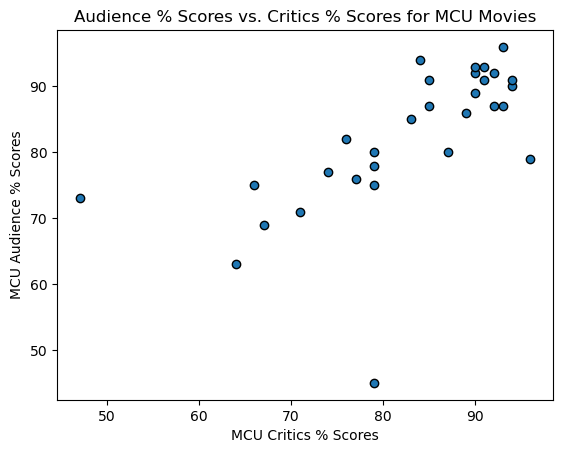

In [ ]:
#Graph critics % score against audience % score
graph1 = plt.scatter(reviews_df["critics % score"], reviews_df["audience % score"], edgecolors="black")
plt.xlabel("MCU Critics % Scores")
plt.ylabel("MCU Audience % Scores")
plt.title("Audience % Scores vs. Critics % Scores for MCU Movies")
display(graph1)

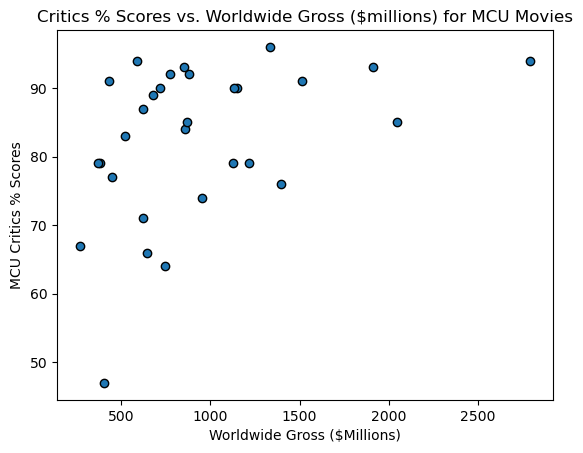

In [ ]:
#Graph Critics % Score against Worldwide Gross
graph2 = plt.scatter(reviews_df["worldwide gross ($m)"], reviews_df["critics % score"], edgecolors="black")
plt.title("Critics % Scores vs. Worldwide Gross ($millions) for MCU Movies")
plt.xlabel("Worldwide Gross ($Millions)")
plt.ylabel("MCU Critics % Scores")
display(graph2)

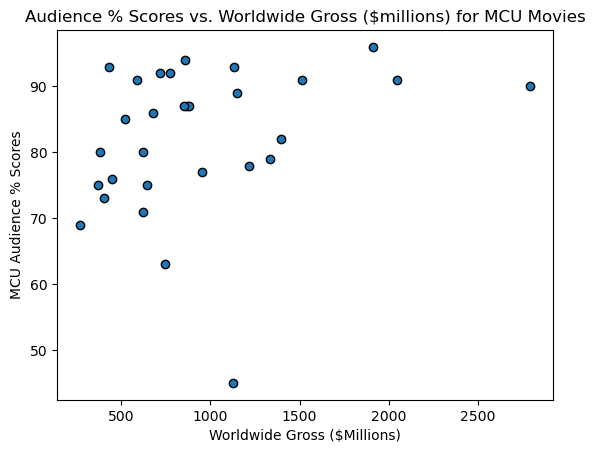

In [ ]:
#Graph Audience % Score against Worldwide Gross
graph3 = plt.scatter(reviews_df["worldwide gross ($m)"], reviews_df["audience % score"], edgecolors="black")
plt.title("Audience % Scores vs. Worldwide Gross ($millions) for MCU Movies")
plt.xlabel("Worldwide Gross ($Millions)")
plt.ylabel("MCU Audience % Scores")
display(graph3)

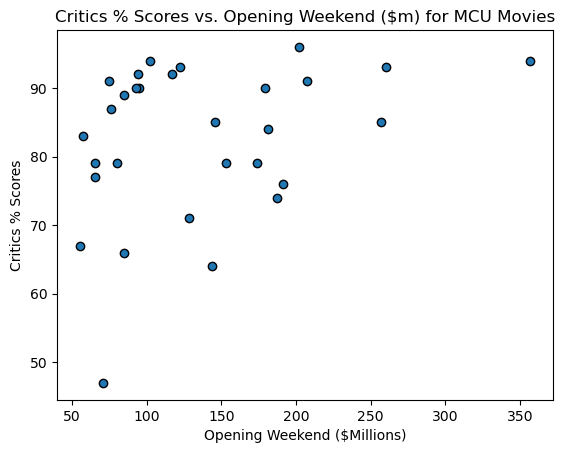

In [68]:
#Graph of Opening Weekend vs. Critics Review Scores
graph4 = plt.scatter(reviews_df["opening weekend ($m)"], reviews_df["critics % score"], edgecolors="black")
plt.title("Critics % Scores vs. Opening Weekend ($m) for MCU Movies")
plt.xlabel("Opening Weekend ($Millions)")
plt.ylabel("Critics % Scores")
display(graph4)

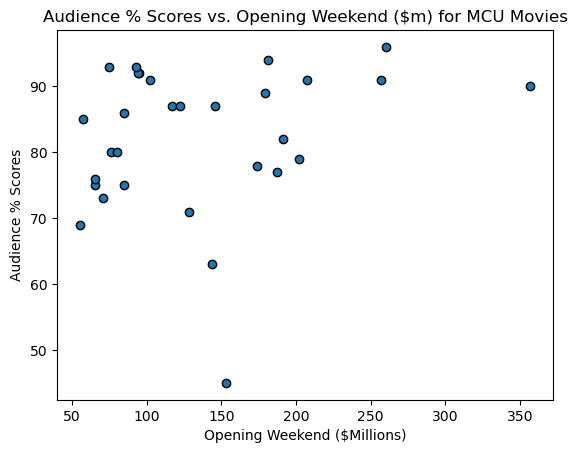

In [69]:
#Graph of Opening Weekend vs. Audience Review Scores
graph5 = plt.scatter(reviews_df["opening weekend ($m)"], reviews_df["audience % score"], edgecolors="black")
plt.title("Audience % Scores vs. Opening Weekend ($m) for MCU Movies")
plt.xlabel("Opening Weekend ($Millions)")
plt.ylabel("Audience % Scores")
display(graph5)